# Functions

In [1]:
def Kauffmann(x):
    return 0.61/(x-0.05)+1.3

def Kewley(x):
    return 0.61/(x-0.47)+1.19

def Stasinska(x):
    return (-30.787+1.1358*x+0.27297*x**2)*np.tanh(5.7409*x)-31.093

def Schawinski(x):
    return 1.05*x+0.45

# Plots parameters

In [2]:
params = {'font.size': 12,
          'figure.figsize': (8.,6.),
          'axes.labelsize': 18,
          'xtick.labelsize': 18,
          'ytick.labelsize': 18
         }

# Libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

In [4]:
plt.rcParams.update(params)

# Importing new data

In [5]:
data_raw = pd.read_csv('../../Data/GALEXFUV_to_SPIRE500_VACs.csv')

In [6]:
data_raw

,LAMID,CATAID,DFAflux_GALEXFUV,DFAErr_GALEXFUV,DeblendErr_GALEXFUV,ABMagDFA_GALEXFUV,ABMagErrDFA_GALEXFUV,MinApCorr_GALEXFUV,MaxApCorr_GALEXFUV,PhotometryWarning_GALEXFUV,...,delfitphot_H,absmag_H,delabsmag_H,absmag_H_stars,fitphot_K,delfitphot_K,absmag_K,delabsmag_K,absmag_K_stars,URL_PNG_STELLARMASSES
0,100000,100000,0.000002,7.963562e-07,2.617298e-08,22.914194,6.236599,1.293492,1.753233,-,...,0.078155,-19.126875,0.085897,-19.224026,17.771402,0.106818,-18.942420,0.117844,-18.979107,http://www.gama-survey.org/dr3/data/files/Stel...
1,100001,100001,0.000000,8.161955e-07,3.193431e-07,-999.000000,-999.000000,1.370058,1.820509,QI,...,0.082345,-23.720797,0.120803,-23.847523,17.186190,0.117651,-23.514349,0.149797,-23.561907,http://www.gama-survey.org/dr3/data/files/Stel...
2,100002,100002,0.000002,1.300735e-06,5.138221e-09,23.419490,10.675610,1.142964,1.506265,-,...,0.072880,-22.746084,0.094923,-22.874350,17.345026,0.103650,-22.536066,0.124717,-22.583942,http://www.gama-survey.org/dr3/data/files/Stel...
3,100003,100003,0.000006,8.889841e-07,1.193218e-07,21.979303,3.346163,1.260873,1.698566,-,...,0.087049,-23.783535,0.122188,-23.971360,17.089546,0.119745,-23.621208,0.156414,-23.691587,http://www.gama-survey.org/dr3/data/files/Stel...
4,100004,100004,0.000015,6.755653e-07,1.844990e-07,20.964342,1.927995,1.418465,1.922459,-,...,0.061311,-24.032934,0.107886,-24.155025,17.811660,0.089325,-23.823230,0.137468,-23.869244,http://www.gama-survey.org/dr3/data/files/Stel...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119185,3021307,3021307,0.000000,4.470180e-07,1.497875e-07,-999.000000,-999.000000,1.481719,1.939730,QI,...,0.172365,-21.091862,0.215009,-21.283213,18.968975,0.229655,-20.951872,0.271270,-21.024254,http://www.gama-survey.org/dr3/data/files/Stel...
119186,3021308,3021308,0.000008,6.846982e-07,6.053342e-08,21.693115,2.946256,1.265493,1.708188,-,...,0.057847,-23.726013,0.112814,-23.844316,18.845049,0.091265,-23.553263,0.145809,-23.597755,http://www.gama-survey.org/dr3/data/files/Stel...
119187,3021309,3021309,0.000009,5.406987e-07,3.275322e-08,21.486710,2.714392,1.300176,1.733213,-,...,0.054647,-23.913560,0.116492,-24.081980,18.506542,0.088523,-23.722710,0.146889,-23.785960,http://www.gama-survey.org/dr3/data/files/Stel...
119188,302131,302131,0.000008,5.571004e-07,6.968634e-08,21.627052,2.932917,1.372688,1.821531,-,...,0.054462,-23.938427,0.106847,-24.050380,18.416360,0.083319,-23.721027,0.139633,-23.763056,http://www.gama-survey.org/dr3/data/files/Stel...


In [7]:
for i in data_raw.keys():
    print(i)

LAMID
CATAID
DFAflux_GALEXFUV
DFAErr_GALEXFUV
DeblendErr_GALEXFUV
ABMagDFA_GALEXFUV
ABMagErrDFA_GALEXFUV
MinApCorr_GALEXFUV
MaxApCorr_GALEXFUV
PhotometryWarning_GALEXFUV
PhotometryFlag_GALEXFUV
DFAflux_GALEXNUV
DFAErr_GALEXNUV
DeblendErr_GALEXNUV
ABMagDFA_GALEXNUV
ABMagErrDFA_GALEXNUV
MinApCorr_GALEXNUV
MaxApCorr_GALEXNUV
PhotometryWarning_GALEXNUV
PhotometryFlag_GALEXNUV
DFAflux_SDSSu
DFAErr_SDSSu
DeblendErr_SDSSu
ABMagDFA_SDSSu
ABMagErrDFA_SDSSu
MinApCorr_SDSSu
MaxApCorr_SDSSu
PhotometryWarning_SDSSu
PhotometryFlag_SDSSu
DFAflux_SDSSg
DFAErr_SDSSg
DeblendErr_SDSSg
ABMagDFA_SDSSg
ABMagErrDFA_SDSSg
MinApCorr_SDSSg
MaxApCorr_SDSSg
PhotometryWarning_SDSSg
PhotometryFlag_SDSSg
DFAflux_SDSSr
DFAErr_SDSSr
DeblendErr_SDSSr
ABMagDFA_SDSSr
ABMagErrDFA_SDSSr
MinApCorr_SDSSr
MaxApCorr_SDSSr
PhotometryWarning_SDSSr
PhotometryFlag_SDSSr
DFAflux_SDSSi
DFAErr_SDSSi
DeblendErr_SDSSi
ABMagDFA_SDSSi
ABMagErrDFA_SDSSi
MinApCorr_SDSSi
MaxApCorr_SDSSi
PhotometryWarning_SDSSi
PhotometryFlag_SDSSi
DFAflux_S

# Data subsets

In [8]:
# BPT diagrams
data_BPT = data_raw[(data_raw['HA_FLUX']>0) &
                (data_raw['HB_FLUX']>0) &
                (data_raw['NIIR_FLUX']>0) &
                (data_raw['OIIIR_FLUX']>0)]

# WHAN diagrams
data_WHAN = data_raw[(data_raw['HA_FLUX']>0) &
                (data_raw['NIIR_FLUX']>0) &
                (data_raw['HA_EW']>0)]

# Diagrams for new data

# BPT diagram

In [9]:
x1 = data_BPT['NIIR_FLUX']/data_BPT['HA_FLUX']
y1 = data_BPT['OIIIR_FLUX']/data_BPT['HB_FLUX']

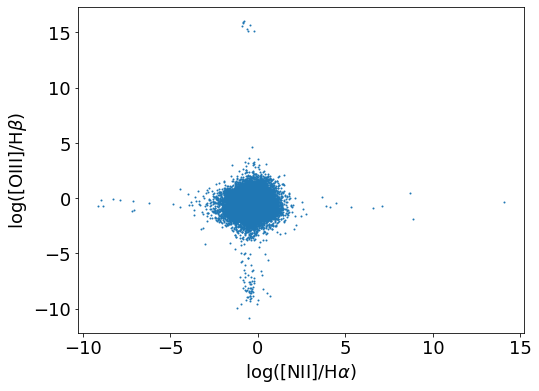

In [10]:
plt.plot(np.log10(x1), np.log10(y1), ls='', marker='o', markersize=1)
plt.xlabel(r'$\log([\mathrm{NII}]/\mathrm{H}\alpha)$')
plt.ylabel(r'$\log([\mathrm{OIII}]/\mathrm{H}\beta)$')
plt.show()

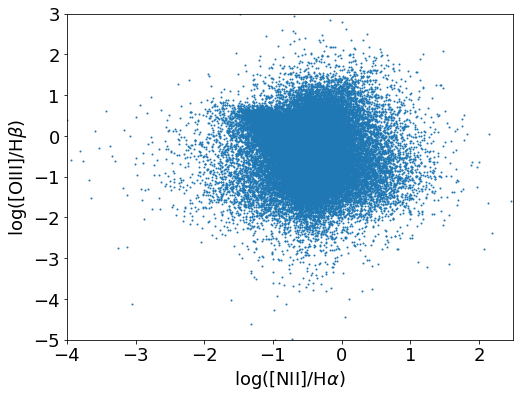

In [11]:
plt.plot(np.log10(x1), np.log10(y1), ls='', marker='o', markersize=1)
plt.xlabel(r'$\log([\mathrm{NII}]/\mathrm{H}\alpha)$')
plt.ylabel(r'$\log([\mathrm{OIII}]/\mathrm{H}\beta)$')
plt.xlim(-4,2.5)
plt.ylim(-5,3)
plt.show()

# WHAN diagram

In [12]:
x2 = data_WHAN['NIIR_FLUX']/data_WHAN['HA_FLUX']
y2 = data_WHAN['HA_EW']

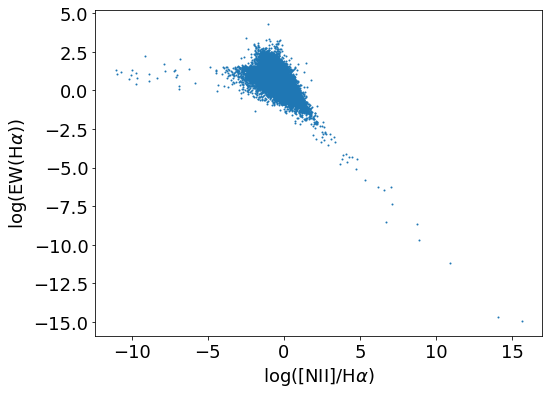

In [13]:
plt.plot(np.log10(x2), np.log10(y2), ls='', marker='o', markersize=1)
plt.xlabel(r'$\log([\mathrm{NII}]/\mathrm{H}\alpha)$')
plt.ylabel(r'$\log(\mathrm{EW}(\mathrm{H}\alpha))$')
plt.show()

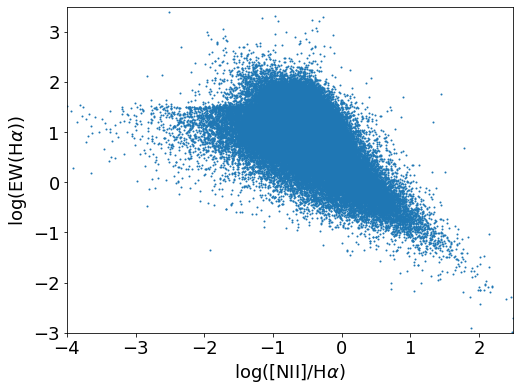

In [14]:
plt.plot(np.log10(x2), np.log10(y2), ls='', marker='o', markersize=1)
plt.xlabel(r'$\log([\mathrm{NII}]/\mathrm{H}\alpha)$')
plt.ylabel(r'$\log(\mathrm{EW}(\mathrm{H}\alpha))$')
plt.xlim(-4,2.5)
plt.ylim(-3,3.5)
plt.show()

# Classification

In [15]:
# WHAN classification
SF = data_WHAN[(np.log10(data_WHAN['NIIR_FLUX']/data_WHAN['HA_FLUX']) < -0.4) & (data_WHAN['HA_EW'] > 3)]
sAGN = data_WHAN[(np.log10(data_WHAN['NIIR_FLUX']/data_WHAN['HA_FLUX']) > -0.4) & (data_WHAN['HA_EW'] > 6)]
wAGN = data_WHAN[(np.log10(data_WHAN['NIIR_FLUX']/data_WHAN['HA_FLUX']) > -0.4) & (data_WHAN['HA_EW'] > 3) 
                 & (data_WHAN['HA_EW'] < 6)]
retired = data_WHAN[(data_WHAN['HA_EW'] < 3) & (data_WHAN['HA_EW'] >= 0.5)]
passive = data_WHAN[(data_WHAN['HA_EW'] < 0.5) & (data_WHAN['NIIR_EW'] < 0.5)]
orange_dots = data_WHAN[(data_WHAN['HA_EW'] < 0.5) | (data_WHAN['NIIR_EW'] < 0.5)]
unclassified = data_raw[(data_raw['HA_FLUX']<=0) |
                (data_raw['NIIR_FLUX']<=0) |
                (data_raw['HA_EW']<=0)]

print('WHAN classification')
print('Star forming:', len(SF))
print('Strong AGN:', len(sAGN))
print('Weak AGN:', len(wAGN))
print('Retired:', len(retired))
print('Passive:', len(passive))
print('Unclassified:', len(data_raw)-len(data_WHAN), " should be equal to ", len(unclassified))

WHAN classification
Star forming: 58275
Strong AGN: 14861
Weak AGN: 5050
Retired: 12590
Passive: 982
Unclassified: 24654  should be equal to  24654


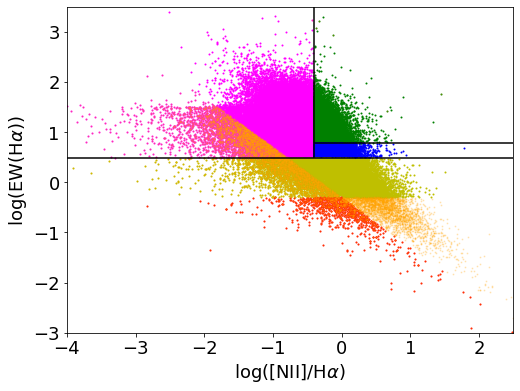

In [16]:
plt.plot(np.log10(SF['NIIR_FLUX']/SF['HA_FLUX']), np.log10(SF['HA_EW']), ls='', marker='o', markersize=1, 
         c='magenta')
plt.plot(np.log10(sAGN['NIIR_FLUX']/sAGN['HA_FLUX']), np.log10(sAGN['HA_EW']), ls='', marker='o', markersize=1, 
         c='g')
plt.plot(np.log10(wAGN['NIIR_FLUX']/wAGN['HA_FLUX']), np.log10(wAGN['HA_EW']), ls='', marker='o', markersize=1, 
         c='b')
plt.plot(np.log10(retired['NIIR_FLUX']/retired['HA_FLUX']), np.log10(retired['HA_EW']), ls='', marker='o', 
         markersize=1, c='y')
plt.plot(np.log10(passive['NIIR_FLUX']/passive['HA_FLUX']), np.log10(passive['HA_EW']), ls='', marker='o', 
         markersize=1, c='red')
plt.plot(np.log10(orange_dots['NIIR_FLUX']/orange_dots['HA_FLUX']), np.log10(orange_dots['HA_EW']), ls='', 
         marker='o', markersize=1, c='orange', alpha=0.2)

plt.axhline(np.log10(3), c='k')
plt.axhline(np.log10(6), xmin=0.555, xmax=1, c='k')
plt.axvline(-0.4, ymin=0.54, c='k')

plt.xlabel(r'$\log([\mathrm{NII}]/\mathrm{H}\alpha)$')
plt.ylabel(r'$\log(\mathrm{EW}(\mathrm{H}\alpha))$')
plt.xlim(-4,2.5)
plt.ylim(-3,3.5)
plt.show()

In [17]:
SF_class = {}
SF_class['CATAID'] = SF['CATAID'].values
SF_class['WHAN classification'] = 'SF'

SF_class_df = pd.DataFrame(SF_class)


sAGN_class = {}
sAGN_class['CATAID'] = sAGN['CATAID'].values
sAGN_class['WHAN classification'] = 'sAGN'

sAGN_class_df = pd.DataFrame(sAGN_class)


wAGN_class = {}
wAGN_class['CATAID'] = wAGN['CATAID'].values
wAGN_class['WHAN classification'] = 'wAGN'

wAGN_class_df = pd.DataFrame(wAGN_class)


retired_class = {}
retired_class['CATAID'] = retired['CATAID'].values
retired_class['WHAN classification'] = 'retired'

retired_class_df = pd.DataFrame(retired_class)


passive_class = {}
passive_class['CATAID'] = passive['CATAID'].values
passive_class['WHAN classification'] = 'passive'

passive_class_df = pd.DataFrame(passive_class)


unclassified_class = {}
unclassified_class['CATAID'] = unclassified['CATAID'].values
unclassified_class['WHAN classification'] = 'unclassified'

unclassified_class_df = pd.DataFrame(unclassified_class)


classification = pd.concat([SF_class_df, sAGN_class_df, wAGN_class_df, retired_class_df, passive_class_df, unclassified_class_df])
classification_sorted = classification.sort_values(by=['CATAID'])
classification_sorted

,CATAID,WHAN classification
2478,14283,sAGN
9895,14295,SF
9903,14296,SF
4012,14300,unclassified
9932,14301,SF
...,...,...
24650,3021306,unclassified
5048,3021307,wAGN
24651,3021308,unclassified
24652,3021309,unclassified


In [18]:
data_raw.sort_values(by=['CATAID'])

,LAMID,CATAID,DFAflux_GALEXFUV,DFAErr_GALEXFUV,DeblendErr_GALEXFUV,ABMagDFA_GALEXFUV,ABMagErrDFA_GALEXFUV,MinApCorr_GALEXFUV,MaxApCorr_GALEXFUV,PhotometryWarning_GALEXFUV,...,delfitphot_H,absmag_H,delabsmag_H,absmag_H_stars,fitphot_K,delfitphot_K,absmag_K,delabsmag_K,absmag_K_stars,URL_PNG_STELLARMASSES
20012,14283,14283,0.000005,5.106872e-07,5.621592e-08,22.161480,2.293512,1.303803,1.763267,-,...,0.065267,-23.079027,0.082423,-23.236994,16.567474,0.093723,-22.918423,0.113417,-22.977924,http://www.gama-survey.org/dr3/data/files/Stel...
20046,14295,14295,0.000002,4.664399e-07,2.227008e-08,23.445604,5.061303,1.405684,1.867317,-,...,0.078232,-23.388310,0.109327,-23.574368,17.329554,0.109825,-23.229408,0.141245,-23.299244,http://www.gama-survey.org/dr3/data/files/Stel...
20057,14296,14296,0.000003,4.848378e-07,1.941860e-08,22.877588,3.581608,1.300967,1.762854,-,...,0.093225,-20.497204,0.117875,-20.604057,18.677105,0.135898,-20.248077,0.147235,-20.288069,http://www.gama-survey.org/dr3/data/files/Stel...
20098,14300,14300,0.000009,2.620990e-07,7.489817e-08,21.508728,1.828757,1.642948,2.071824,-,...,0.091470,-23.886593,0.133606,-24.095255,17.171640,0.126549,-23.737670,0.169899,-23.816120,http://www.gama-survey.org/dr3/data/files/Stel...
20109,14301,14301,0.000004,4.420882e-07,3.998670e-08,22.455359,2.841986,1.286663,1.739219,-,...,0.084344,-23.026209,0.116096,-23.217817,17.869810,0.112972,-22.886908,0.147482,-22.958870,http://www.gama-survey.org/dr3/data/files/Stel...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119184,3021306,3021306,0.000009,7.135078e-07,1.472639e-07,21.521357,2.735055,1.196543,1.584939,-,...,0.153613,-22.174864,0.210335,-22.313564,19.461044,0.184629,-22.036707,0.262454,-22.088905,http://www.gama-survey.org/dr3/data/files/Stel...
119185,3021307,3021307,0.000000,4.470180e-07,1.497875e-07,-999.000000,-999.000000,1.481719,1.939730,QI,...,0.172365,-21.091862,0.215009,-21.283213,18.968975,0.229655,-20.951872,0.271270,-21.024254,http://www.gama-survey.org/dr3/data/files/Stel...
119186,3021308,3021308,0.000008,6.846982e-07,6.053342e-08,21.693115,2.946256,1.265493,1.708188,-,...,0.057847,-23.726013,0.112814,-23.844316,18.845049,0.091265,-23.553263,0.145809,-23.597755,http://www.gama-survey.org/dr3/data/files/Stel...
119187,3021309,3021309,0.000009,5.406987e-07,3.275322e-08,21.486710,2.714392,1.300176,1.733213,-,...,0.054647,-23.913560,0.116492,-24.081980,18.506542,0.088523,-23.722710,0.146889,-23.785960,http://www.gama-survey.org/dr3/data/files/Stel...


In [19]:
# BPT classification
sf = data_BPT[(np.log10(data_BPT['OIIIR_FLUX']/data_BPT['HB_FLUX']) < Stasinska(np.log10(data_BPT['NIIR_FLUX']/data_BPT['HA_FLUX']))) & 
              (np.log10(data_BPT['NIIR_FLUX']/data_BPT['HA_FLUX']) < 10)]
seyfert = data_BPT[((np.log10(data_BPT['OIIIR_FLUX']/data_BPT['HB_FLUX']) > Kewley(np.log10(data_BPT['NIIR_FLUX']/data_BPT['HA_FLUX']))) & 
                    (np.log10(data_BPT['OIIIR_FLUX']/data_BPT['HB_FLUX']) > Schawinski(np.log10(data_BPT['NIIR_FLUX']/data_BPT['HA_FLUX'])))) | 
                   ((np.log10(data_BPT['NIIR_FLUX']/data_BPT['HA_FLUX']) >= 0.4) & 
                    (np.log10(data_BPT['OIIIR_FLUX']/data_BPT['HB_FLUX']) > Schawinski(np.log10(data_BPT['NIIR_FLUX']/data_BPT['HA_FLUX']))))]
liners = data_BPT[((np.log10(data_BPT['OIIIR_FLUX']/data_BPT['HB_FLUX']) > Kewley(np.log10(data_BPT['NIIR_FLUX']/data_BPT['HA_FLUX']))) & 
                   (np.log10(data_BPT['OIIIR_FLUX']/data_BPT['HB_FLUX']) < Schawinski(np.log10(data_BPT['NIIR_FLUX']/data_BPT['HA_FLUX'])))) | 
                  ((np.log10(data_BPT['NIIR_FLUX']/data_BPT['HA_FLUX']) >= 0.4) & 
                   (np.log10(data_BPT['OIIIR_FLUX']/data_BPT['HB_FLUX']) < Schawinski(np.log10(data_BPT['NIIR_FLUX']/data_BPT['HA_FLUX']))))]
composite = data_BPT[(np.log10(data_BPT['OIIIR_FLUX']/data_BPT['HB_FLUX']) > Stasinska(np.log10(data_BPT['NIIR_FLUX']/data_BPT['HA_FLUX']))) & 
                     (np.log10(data_BPT['OIIIR_FLUX']/data_BPT['HB_FLUX']) < Kewley(np.log10(data_BPT['NIIR_FLUX']/data_BPT['HA_FLUX']))) & 
                     (np.log10(data_BPT['NIIR_FLUX']/data_BPT['HA_FLUX']) < 0.4)]
unclassified_bpt = data_raw[(data_raw['HA_FLUX']<=0) | 
                            (data_raw['HB_FLUX']<=0) |
                            (data_raw['NIIR_FLUX']<=0) |
                            (data_raw['OIIIR_FLUX']<=0)]

print('BPT classification')
print('Star forming:', len(sf))
print('Seyfert:', len(seyfert))
print('LINERs:', len(liners))
print('Composite:', len(composite))
print('Unclassified:', len(data_raw)-len(data_BPT), " should be equal to ", len(unclassified_bpt))

BPT classification
Star forming: 43648
Seyfert: 3603
LINERs: 4579
Composite: 19836
Unclassified: 47524  should be equal to  47524


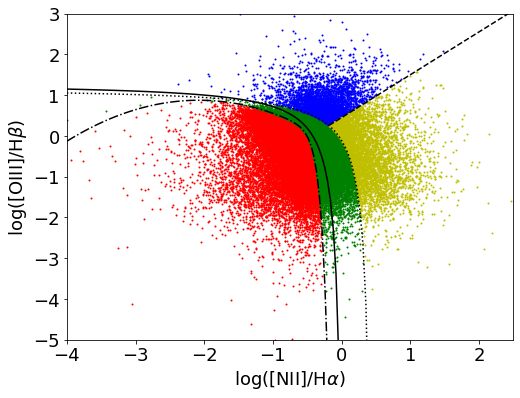

In [20]:
plt.plot(np.log10(sf['NIIR_FLUX']/sf['HA_FLUX']), 
         np.log10(sf['OIIIR_FLUX']/sf['HB_FLUX']), ls='', marker='o', markersize=1, c='r')
plt.plot(np.log10(composite['NIIR_FLUX']/composite['HA_FLUX']), 
         np.log10(composite['OIIIR_FLUX']/composite['HB_FLUX']), ls='', marker='o', markersize=1, c='g')
plt.plot(np.log10(seyfert['NIIR_FLUX']/seyfert['HA_FLUX']), 
         np.log10(seyfert['OIIIR_FLUX']/seyfert['HB_FLUX']), ls='', marker='o', markersize=1, c='b')
plt.plot(np.log10(liners['NIIR_FLUX']/liners['HA_FLUX']), 
         np.log10(liners['OIIIR_FLUX']/liners['HB_FLUX']), ls='', marker='o', markersize=1, c='y')

xx1 = np.linspace(-4, 0.4, 100)
xx2 = np.linspace(-4, 0, 100)
xx3 = np.linspace(-4, 0, 100)
xx4 = np.linspace(-0.18, 2.5, 100)

plt.plot(xx1, Kewley(xx1), ls='dotted', c='k', label='Kewley+01')
plt.plot(xx2, Kauffmann(xx2), ls='-', c='k', label='Kauffman+03')
plt.plot(xx3, Stasinska(xx3), ls='-.', c='k', label='Stasińska+06')
plt.plot(xx4, Schawinski(xx4), ls='--', c='k', label='Schawinski+07')

plt.xlabel(r'$\log([\mathrm{NII}]/\mathrm{H}\alpha)$')
plt.ylabel(r'$\log([\mathrm{OIII}]/\mathrm{H}\beta)$')
plt.xlim(-4,2.5)
plt.ylim(-5,3)
plt.show()

In [21]:
sf_class = {}
sf_class['CATAID'] = sf['CATAID'].values
sf_class['BPT classification'] = 'SF'

sf_class_df = pd.DataFrame(sf_class)


seyfert_class = {}
seyfert_class['CATAID'] = seyfert['CATAID'].values
seyfert_class['BPT classification'] = 'seyfert'

seyfert_class_df = pd.DataFrame(seyfert_class)


liners_class = {}
liners_class['CATAID'] = liners['CATAID'].values
liners_class['BPT classification'] = 'LINERs'

liners_class_df = pd.DataFrame(liners_class)


composite_class = {}
composite_class['CATAID'] = composite['CATAID'].values
composite_class['BPT classification'] = 'composite'

composite_class_df = pd.DataFrame(composite_class)


unclassified_bpt_class = {}
unclassified_bpt_class['CATAID'] = unclassified_bpt['CATAID'].values
unclassified_bpt_class['BPT classification'] = 'unclassified'

unclassified_bpt_class_df = pd.DataFrame(unclassified_bpt_class)


classification_bpt = pd.concat([sf_class_df, seyfert_class_df, liners_class_df, composite_class_df, unclassified_bpt_class_df])
classification_bpt_sorted = classification_bpt.sort_values(by=['CATAID'])
classification_bpt_sorted

,CATAID,BPT classification
3321,14283,composite
7998,14295,unclassified
7367,14296,SF
8015,14300,unclassified
7383,14301,SF
...,...,...
47519,3021306,unclassified
4578,3021307,LINERs
47520,3021308,unclassified
47521,3021309,unclassified


In [22]:
final_classification = pd.merge(classification_sorted, classification_bpt_sorted, on='CATAID')
final_classification

,CATAID,WHAN classification,BPT classification
0,14283,sAGN,composite
1,14295,SF,unclassified
2,14296,SF,SF
3,14300,unclassified,unclassified
4,14301,SF,SF
...,...,...,...
116407,3021306,unclassified,unclassified
116408,3021307,wAGN,LINERs
116409,3021308,unclassified,unclassified
116410,3021309,unclassified,unclassified


# Spectra

In [23]:
l_pivot = [1535, 2301, 3557, 4702, 6175, 7491, 8946, 8800, 10213, 12525, 16433, 21503, 
           3.37*10**4, 4.62*10**4, 12.1*10**4, 22.8*10**4, 101*10**4, 161*10**4, 249*10**4, 357*10**4, 504*10**4]
flux = [max(data_raw['DFAflux_GALEXFUV']), max(data_raw['DFAflux_GALEXNUV']), max(data_raw['DFAflux_SDSSu']), 
        max(data_raw['DFAflux_SDSSg']), max(data_raw['DFAflux_SDSSr']), max(data_raw['DFAflux_SDSSi']), 
        max(data_raw['DFAflux_SDSSz']), max(data_raw['DFAflux_VIKINGZ']), max(data_raw['DFAflux_VIKINGY']), 
        max(data_raw['DFAflux_VIKINGJ']), max(data_raw['DFAflux_VIKINGH']), max(data_raw['DFAflux_VIKINGK']), 
        max(data_raw['DFAflux_WISEW1']), max(data_raw['DFAflux_WISEW2']), max(data_raw['DFAflux_WISEW3']), 
        max(data_raw['DFAflux_WISEW4']), max(data_raw['DFAflux_PACS100']), max(data_raw['DFAflux_PACS160']), 
        max(data_raw['DFAflux_SPIRE250']), max(data_raw['DFAflux_SPIRE350']), max(data_raw['DFAflux_SPIRE500'])]

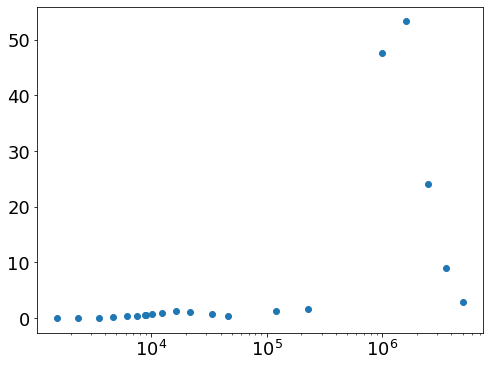

In [24]:
plt.scatter(l_pivot, flux)
plt.xscale('log')
#plt.xlim(0, 5*10**3)
#plt.ylim(-1,5)